In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import StandardScaler
%store -r X_features
%store -r X_features_poly
%store -r y_labels

%store -r totaldf


In [2]:
svm_lin_reg = joblib.load("svm_lin_reg.pkl")
optimized_svm_regressor = joblib.load("optimized_svm_regressor.pkl")
_randomly_optimized_svm_regressor = joblib.load("_randomly_optimized_svm_regressor.pkl")
svm_poly_reg = joblib.load("svm_poly_reg.pkl")
svm_rbf_reg = joblib.load("svm_rbf_reg.pkl")
svm_rbf_poly_reg = joblib.load("svm_rbf_poly_reg.pkl")
svm_poly2_reg = joblib.load('svm_poly2_reg.pkl')
svm_poly3_reg = joblib.load('svm_poly3_reg.pkl')

In [3]:
totaldf.insert(5,'lin svm μ',totaldf.μob*(np.exp(np.power(svm_lin_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(6,'optimized svm μ', totaldf.μob*(np.exp(np.power(optimized_svm_regressor.predict(X_features[2]),2)) -0.0012))
totaldf.insert(7,'random optimized svm μ', totaldf.μob*(np.exp(np.power(_randomly_optimized_svm_regressor.predict(X_features[2]),2)) -0.0012))
totaldf.insert(8,'poly features lin svm μ', totaldf.μob*(np.exp(np.power(svm_poly_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(9,'poly lasso μ', totaldf.μob*(np.exp(np.power(svm_rbf_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(10,'svm rbf poly  μ', totaldf.μob*(np.exp(np.power(svm_rbf_poly_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(11,'svm poly reg 2 μ', totaldf.μob*(np.exp(np.power(svm_poly2_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(12,'svm poly reg 3 μ', totaldf.μob*(np.exp(np.power(svm_poly3_reg.predict(X_features[2]),2)) -0.0012))


In [4]:
totaldf

,Pb,P,ΔP,μob,μ,lin svm μ,optimized svm μ,random optimized svm μ,poly features lin svm μ,poly lasso μ,svm rbf poly μ,svm poly reg 2 μ,svm poly reg 3 μ
0,2200.290403,2200.290403,0.000000,0.998694,0.998694,0.998711,1.004665,1.005716,0.998628,0.998758,0.998777,0.998941,0.998408
1,2200.290403,2348.433431,148.143028,0.998694,1.007933,1.014649,1.011808,1.011753,1.011780,1.011046,1.011240,1.084626,1.030309
2,2200.290403,2496.576459,296.286056,0.998694,1.017506,1.026827,1.022573,1.022815,1.022671,1.022289,1.023177,1.098946,1.055869
3,2200.290403,2644.719487,444.429084,0.998694,1.027358,1.038492,1.032537,1.032631,1.033452,1.033247,1.034940,1.102439,1.074511
4,2200.290403,2792.862515,592.572112,0.998694,1.037444,1.049947,1.042555,1.042833,1.044185,1.044243,1.046505,1.103105,1.086776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,3910.215923,5560.049012,1649.833090,0.125504,0.155127,0.137661,0.150466,0.151000,0.143013,0.144506,0.142594,0.138802,0.139349
16,3910.215923,5670.037885,1759.821962,0.125504,0.157137,0.138425,0.151895,0.152458,0.144261,0.145736,0.143992,0.139043,0.139798
17,3910.215923,5780.026758,1869.810835,0.125504,0.159150,0.139191,0.153220,0.153845,0.145523,0.146963,0.145406,0.139389,0.140275
18,3910.215923,5890.015630,1979.799708,0.125504,0.161165,0.139959,0.154441,0.155156,0.146798,0.148194,0.146827,0.139846,0.140791


In [6]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(8):
        average_error.append(np.average((a.iloc[:,i+5]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+5]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+5]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+5]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index =['Linear ',"Grid optimized",'Random Grid optimized','linear polynomial features','RBF ','RBF polynomial features','Polynomial 2nd degree ','Polynomial 3rd degree'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Linear,-0.975898,5.076496,3.206401,4.054896
Grid optimized,0.008156,4.641064,2.979300,3.558555
Random Grid optimized,0.140738,4.634974,3.014708,3.523397
linear polynomial features,-0.547230,5.164885,3.056923,4.198894
RBF,-0.565935,4.913000,2.974443,3.951017
RBF polynomial features,-0.607499,4.992831,3.031381,4.013495
Polynomial 2nd degree,0.139672,14.772082,6.196201,13.410482
Polynomial 3rd degree,-0.461752,7.849370,4.809812,6.220251


In [6]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear svm,-0.798968,4.214018,2.724525,4.152886
optimized svm,-0.038438,5.150193,3.597337,6.687464
random svm,-0.131898,4.390130,3.102539,4.940594
linear svm poly features,-0.118535,3.493042,2.260046,3.864816
rbf svm,0.252364,3.369221,2.146850,4.000068
rbf svm poly features,0.118485,3.392237,2.169045,3.980732
polynomial svm order 2,-0.038438,5.150193,3.597337,6.687464
polynomial svm order 3,-0.131898,4.390130,3.102539,4.940594


In [7]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear svm,-0.446623,6.117451,3.704204,82.169350
optimized svm,-6.302913,9.678417,7.781795,126.213568
random svm,-1.906277,7.526932,5.312247,101.235361
linear svm poly features,-2.589674,6.392442,4.252191,94.471989
rbf svm,-3.056030,6.256651,4.446444,90.601627
rbf svm poly features,-2.951743,6.309816,4.386204,91.131852
polynomial svm order 2,-6.302913,9.678417,7.781795,126.213568
polynomial svm order 3,-1.906277,7.526932,5.312247,101.235361


In [8]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear svm,-0.628027,4.927793,3.121794,135.803172
optimized svm,-3.299519,5.740899,4.859949,156.046588
random svm,-0.840279,6.635374,4.758929,187.515746
linear svm poly features,-1.335564,4.806420,2.887975,137.417557
rbf svm,-0.918411,4.513141,2.824232,130.508170
rbf svm poly features,-0.930079,4.737838,2.918631,138.436239
polynomial svm order 2,-3.299519,5.740899,4.859949,156.046588
polynomial svm order 3,-0.840279,6.635374,4.758929,187.515746


In [9]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear svm,-6.450520,5.091093,6.465424,1191.248469
optimized svm,13.179236,17.227222,13.525769,3545.808290
random svm,3.544413,10.411644,7.456087,1710.475638
linear svm poly features,3.004850,8.558812,5.680544,1486.007305
rbf svm,5.103347,9.097535,6.499232,1686.758741
rbf svm poly features,4.144806,8.901790,6.062633,1594.874712
polynomial svm order 2,13.179236,17.227222,13.525769,3545.808290
polynomial svm order 3,3.544413,10.411644,7.456087,1710.475638


In [10]:
def UndersatErrorPlot(a):
    models = ['linear svm','polynomial svm order 2 ','polynomial svm order 3','linear svm poly features','rbf svm','rbf svm poly features']
    b = models.index(a)
    plt.scatter((totaldf.ΔP),(totaldf.iloc[:,b+5]-totaldf.μ)/totaldf.μ*100,facecolors='none', edgecolors='b')
    plt.rcParams['figure.figsize'] = (15, 8)
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Presure-Bubble point pressure(Psia)')
    plt.ylabel('% Error')
    plt.ylabel
  

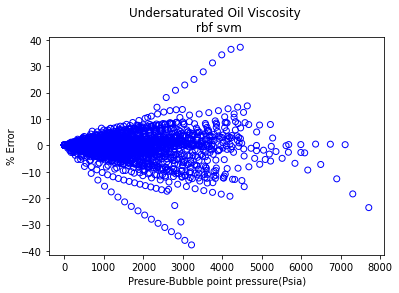

In [11]:
UndersatErrorPlot('rbf svm')

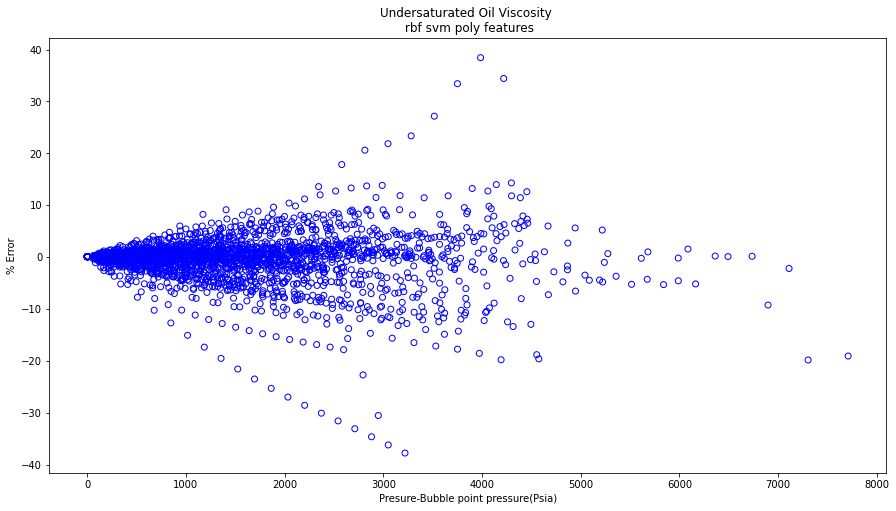

In [12]:
UndersatErrorPlot('rbf svm poly features')

In [13]:
def UndersatViscPlot(a):
    models = ['linear svm','polynomial svm order 2 ','polynomial svm order 3','linear svm poly features','rbf svm','rbf svm poly features']
    b = models.index(a)
    plt.scatter(totaldf.μ,totaldf.iloc[:,b+5],facecolors ='none', edgecolors='b')
    plt.rcParams['figure.figsize'] = (15, 8)
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Measured Viscosity(cp)')
    plt.ylabel('Calculated Viscosity(cp)')

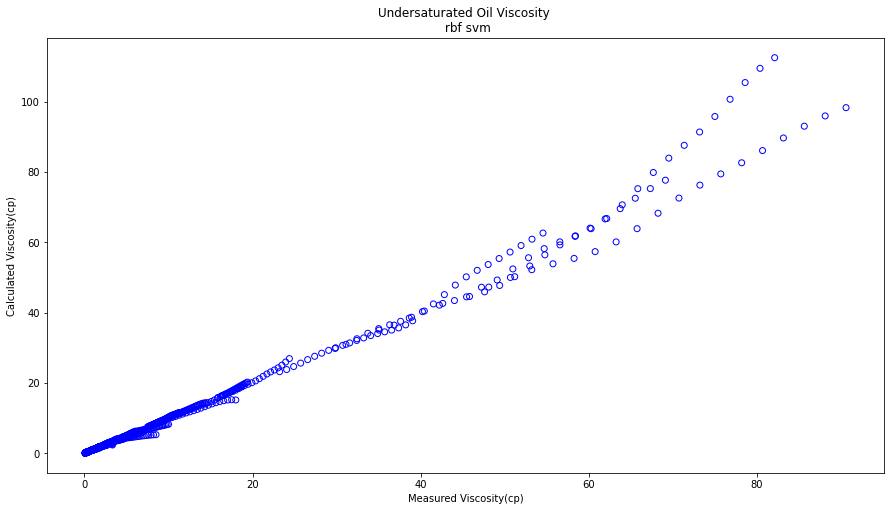

In [14]:
UndersatViscPlot('rbf svm')

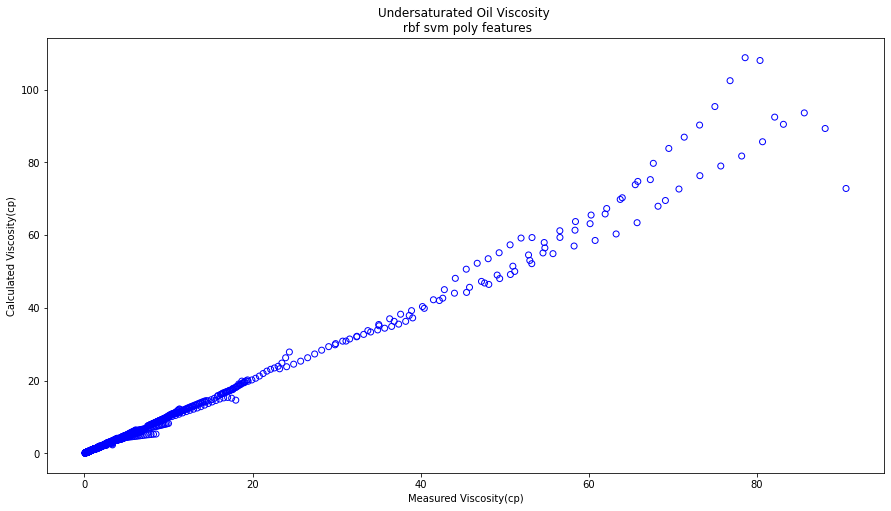

In [15]:
UndersatViscPlot('rbf svm poly features')

Text(0, 0.5, '% Average Absolute Error')

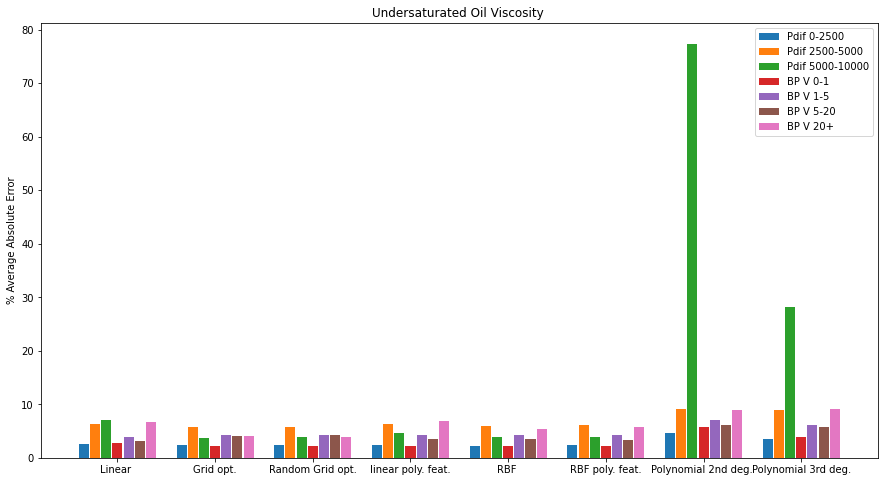

In [11]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}    
models =['Linear ',"Grid opt.",'Random Grid opt.','linear poly. feat.','RBF ','RBF poly. feat.','Polynomial 2nd deg. ','Polynomial 3rd deg.']


%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(8), models)
plt.title('Undersaturated Oil Viscosity ')
plt.ylabel("% Average Absolute Error")